<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 04: Distance, Adjacency and Contiguity </h3>

# Reminders 

1. Lab2 is due next week
2. Quiz 2 is tomorrow

# Characterizing location of an object

* 1d - one reference point 
* 2d - two reference points

# Coordinate Systems 

* Plane Coordinate systems
    * Cartesian coordinates (origin + axes). $x$ (horizontal, E-W), $y$ (vertical, N-S).
    * Polar coordinates (distance from origin + angle): R and $\theta$. $x=r \sin \theta$, $y=r \cos \theta$, $r=\sqrt{x^2+y^2}$, $\theta=\arctan(x/y)$
* Global Reference Systems
    * Latitude (90 degrees S/N, parallels, ecuator), Longitude (180 degrees E/W, meridians, Greenwich). Graticule. 

<h1> <center> Distance </h1>

# Georeferencing and distance

* Once we can 'place' an object in space we can calculate the distance between any number of objects
* Distance will depend on the underlying coordinate system that we use 
    * large distances: use great circle distance 
    * small distances: use Euclidean coordinates or other CS

# Great Circle Distance 

* Assume Earth is a sphere with radius $R$ and two points $A(\phi_1, \lambda_1)$ and $B(\phi_2, \lambda_2)$
* Formula: 
$$
d = R \arccos([\sin \phi_1 \times \sin \phi_2]+[\cos \phi_1 \times cos \phi_2 \times cos(\lambda_1 - \lambda_2)])
$$

# Exercise 

> In groups of 2-4 people, write a Python program that calculates great circle distance between NYC and London. 

In [1]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
import numpy as np
import math
from geopy.distance import great_circle

def great_circle_dist(a,b):
    '''
    given two points a and b, calculate great circle distance between them
    where phi(s) are latitudes and lambda(s) are longitudes
    '''
    r = 6378.1 # km
    phi1 = math.radians(a[1]) 
    phi2 = math.radians(b[1])
    lambda1 = math.radians(a[0])
    lambda2 = math.radians(b[0])
    
    d = r * math.acos((math.sin(phi1)*math.sin(phi2)) + (math.cos(phi1)*math.cos(phi2)*math.cos(abs(lambda1-lambda2))))
    return d 

NYC = (-73.935242, 40.730610) # lng, lat
London = (-0.1275, 51.50722) # lng, lat

dist = great_circle_dist(NYC, London)
print(dist, 'km')
print(great_circle(NYC[::-1], London[::-1]))

5570.560077026861 km
5564.366878189245 km


In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -73.935242, 40.730610
lnd_lon, lnd_lat = -0.1275, 51.50722

plt.plot([ny_lon, lnd_lon], [ny_lat, lnd_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, lnd_lon], [ny_lat, lnd_lat],
         color='red', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(lnd_lon + 3, lnd_lat - 12, 'London',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

ax.set_extent([-100,30,0,80])
plt.savefig('flights.jpeg')
plt.close()

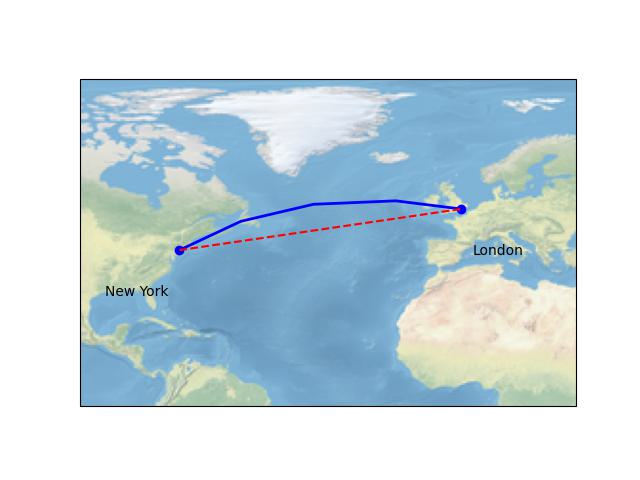

In [4]:
from IPython.display import Image
Image(filename='flights.jpeg') 

In [5]:
import osmnx as ox
import pyproj 
import geopandas as gpd
#pyproj.datadir.get_data_dir()
#pyproj.datadir.set_data_dir('C:/Users/barguzin/Anaconda3/envs/geo_env/Library/share/proj')
ox.settings.use_cache = True
import contextily as cx

goleta = ox.geocode_to_gdf("Goleta, CA, USA") # get Goleta

go_graph = ox.graph_from_place('Goleta, CA, USA', network_type="drive")
go_nodes, go_streets  = ox.graph_to_gdfs(go_graph)

tags = {'amenity': ['pub', 'bar', 'cafe', 'restaurant']} # used for parsing OSM data
dist = 5000 # set search radius (in meters) 

# download POIs
pois = ox.geometries.geometries_from_point(center_point = (goleta.lat[0],goleta.lon[0]), tags=tags, dist=dist)
# keep only points 
pois = pois.loc[pois.geom_type=="Point"]

go_proj = ox.project_gdf(goleta, to_crs='EPSG:3857') # re-project layers
go_streets_proj = ox.project_gdf(go_streets, to_crs='EPSG:3857')
pois_proj = ox.project_gdf(pois, to_crs='EPSG:3857')

# print to the output
pois.head(3)

amenity      brand brand:wikidata brand:wikipedia  \
element_type osmid                                                              
node         448863565         cafe  Starbucks         Q37158    en:Starbucks   
             1341709739  restaurant        NaN            NaN             NaN   
             1348747781  restaurant        NaN            NaN             NaN   

                             cuisine                         name  \
element_type osmid                                                  
node         448863565   coffee_shop                    Starbucks   
             1341709739     american                         IHOP   
             1348747781       indian  Masala Spice Indian Cuisine   

                            official_name takeaway  \
element_type osmid                                   
node         448863565   Starbucks Coffee      yes   
             1341709739               NaN      NaN   
             1348747781               NaN      NaN   

                                            geometry           source  ...  \
element_type osmid                                                     ...   
node         448863565   POINT (-119.84817 34.41147)              NaN  ...   
             1341709739  POINT (-119.78818 34.44325)  Local Knowledge  ...   
             1348747781  POINT (-119.82570 34.44172)              NaN  ...   

                        disused:building capacity height roof:colour  \
element_type osmid                                                     
node         448863565               NaN      NaN    NaN         NaN   
             1341709739              NaN      NaN    NaN         NaN   
             1348747781              NaN      NaN    NaN         NaN   

                        roof:shape contact:facebook addr:housename  \
element_type osmid                                                   
node         448863565         NaN              NaN            NaN   
             1341709739        NaN              NaN            NaN   
             1348747781        NaN              NaN            NaN   

                        designation ways type  
element_type osmid                             
node         448863565          NaN  NaN  NaN  
             1341709739         NaN  NaN  NaN  
             1348747781         NaN  NaN  NaN  

[3 rows x 58 columns]

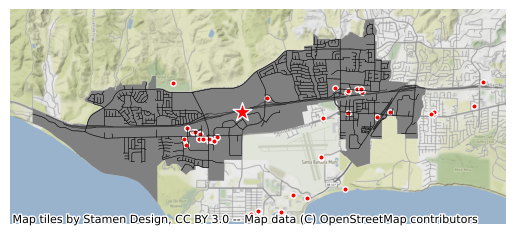

In [6]:
fig, ax = plt.subplots()

go_proj.plot(ax=ax, color='gray') 
go_streets_proj.plot(ax=ax, zorder=2, lw=.25, color='k')
pois_proj.plot(ax=ax, color='r', markersize=15, ec='w')
go_proj.centroid.plot(color='r', markersize=200, ec='w', marker='*', ax=ax, zorder=3)
cx.add_basemap(ax=ax)
_ = ax.axis("off")

# Different Types of Distance

> Assume we would like to calculate how far each of the POIs from the center of the polygon. 

1. Calculate pairwise distance between points 
    1. Euclidean
    2. Manhattan 
    3. Network distance 

In [7]:
centr = gpd.GeoDataFrame(data=[1], columns=['geo_id'], geometry=go_proj.geometry.centroid)

dist_to_centr = pois_proj.distance(centr.geometry.iloc[0]).reset_index()
dist_to_centr.drop('element_type', axis=1, inplace=True)
dist_to_centr.columns = ['osm_id', 'dist_m']
dist_to_centr.head()

,osm_id,dist_m
0,448863565,3548.258535
1,1341709739,8014.092418
2,1348747781,3856.467935
3,1396621915,2469.264505
4,1469690940,6317.223055


In [8]:
# add the data back to the pois_proj 
print(pois_proj.shape)
pois_proj = pois_proj.merge(dist_to_centr, left_on='osmid', right_on='osm_id')
print(pois_proj.shape)
print(type(pois_proj))

(46, 58)
(46, 60)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [9]:
import shapely.geometry as spg 

lines = []

for i, j in zip(pois_proj.geometry.values, np.repeat(centr.centroid.geometry.values, pois_proj.shape[0])):
    ax, ay = i.x, i.y
    bx, by = j.x, j.y
    l = spg.LineString([(ax,ay),(bx,by)])
    lines.append(l)
    
lines_gdf = gpd.GeoDataFrame(data=np.arange(0,len(lines)), columns=['geo_id'], geometry=lines, crs='epsg:3857')

print(lines_gdf.crs, centr.crs)
lines_gdf.head()

epsg:3857 EPSG:3857


,geo_id,geometry
0,0,"LINESTRING (-13341437.257 4084187.000, -133427..."
1,1,"LINESTRING (-13334759.579 4088475.583, -133427..."
2,2,"LINESTRING (-13338935.474 4088270.153, -133427..."
3,3,"LINESTRING (-13344993.881 4088445.536, -133427..."
4,4,"LINESTRING (-13336396.922 4087430.222, -133427..."


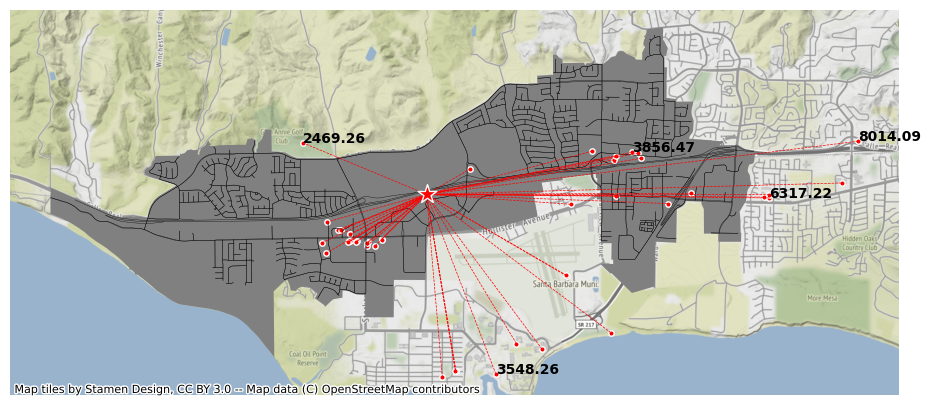

In [10]:
fig, ax = plt.subplots(figsize=(12,5))

go_proj.plot(ax=ax, color='gray') 
go_streets_proj.plot(ax=ax, zorder=2, lw=.25, color='k')
pois_proj.plot(ax=ax, color='r', markersize=15, ec='w')
go_proj.centroid.plot(color='r', markersize=200, ec='w', marker='*', ax=ax, zorder=3)
lines_gdf.plot(ax=ax, color='r', linestyle='dashed', linewidth=.5)
cx.add_basemap(ax=ax)
    
for index, row in pois_proj.iloc[:5,].iterrows():
    ax.annotate(np.round(row['dist_m'],2), (row['geometry'].x, row['geometry'].y), fontsize=10, weight='bold')

_ = ax.axis("off")

In [11]:
print(f'Average distance from POIs to the centroid of Goleta is {np.round(pois_proj.dist_m.mean(),2)}m')

Average distance from POIs to the centroid of Goleta is 3039.32m


In [12]:
# reproject graph and generate find central node
Gp = ox.project_graph(go_graph, to_crs='epsg:3857')
# find each nearest node to several points, and optionally return distance
nodes, dists = ox.nearest_nodes(Gp, pois_proj.geometry.x, pois_proj.geometry.y, return_dist=True)

centr_node = ox.nearest_nodes(Gp, centr.geometry.x, centr.geometry.y)
centr_node = centr_node[0]

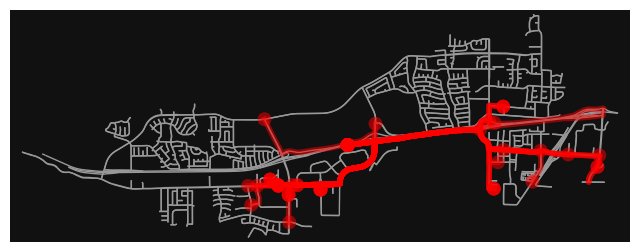

In [13]:
routes_list = []
for i in nodes:
    route = ox.shortest_path(Gp, centr_node, list(go_graph[i])[0], weight="length")
    if route is not None:
        routes_list.append(route)

ox.plot_graph_routes(Gp, routes=routes_list, route_linewidth=1, node_size=0);

Average distance from POIs to the centroid of Goleta on the road network: 3763.46m


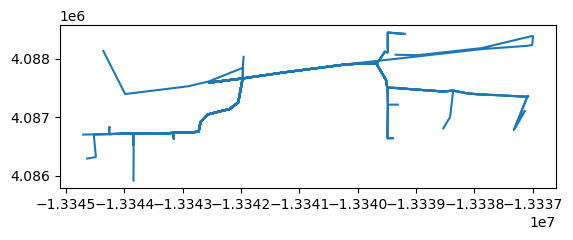

In [14]:
# create lines from routes 
nodes2, edges2 = ox.graph_to_gdfs(Gp)

list_lines = []

for r in routes_list:
    route_nodes = nodes2.loc[r]
    l = spg.LineString(route_nodes['geometry'].to_list())
    list_lines.append(l)

gdf1 = gpd.GeoDataFrame(geometry=list_lines, crs='epsg:3857')

print(f'Average distance from POIs to the centroid of Goleta on the road network: {np.round(gdf1.geometry.length.mean(),2)}m')

gdf1.plot();

# Geographic Proximity  

> What do we call adjacent when it comes to points, lines, polygons? 

1. Buffer
2. Nearest Neighbor
3. Adjacency

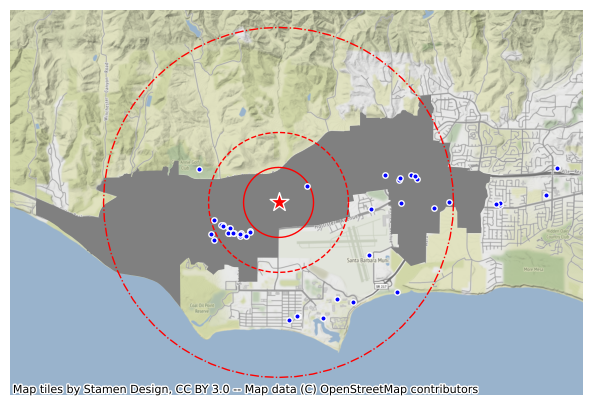

In [15]:
# Buffer
fig, ax = plt.subplots(figsize=(12,5))

go_proj.plot(ax=ax, color='gray') 
go_proj.centroid.plot(color='r', markersize=200, ec='w', marker='*', ax=ax)
go_proj.centroid.buffer(1000).plot(fc='None', ec='r', ax=ax)
go_proj.centroid.buffer(2000).plot(fc='None', ec='r', ax=ax, linestyle='dashed')
go_proj.centroid.buffer(5000).plot(fc='None', ec='r', ax=ax, linestyle='-.')

pois_proj.plot(ax=ax, color='b', markersize=15, ec='w')
cx.add_basemap(ax=ax)

_ = ax.axis("off")

# Polygons

<img src="https://www.researchgate.net/profile/Melissa-Rura-Porterfield/publication/252401954/figure/fig1/AS:650033523347555@1531991477972/Rooks-case-blue-and-Queens-case-red-adjacency-and-order-of-adjacency-for-a.png">

In [16]:
import cenpy 
dectest = cenpy.products.Decennial2010()
gol_data = dectest.from_place('Goleta,CA', level='block', variables=['^P004', 'P001001'])

fig, ax = plt.subplots(figsize=(12,4))

gol_data.plot(column='P004003', cmap='Reds', ax=ax, fc='w', ec='k');
gol_data.plot(ax=ax, fc='None', ec='k');

ModuleNotFoundError: No module named 'cenpy'

In [20]:
from pysal.lib import weights

w_queen = weights.contiguity.Queen.from_dataframe(gol_data)
w_rook = weights.contiguity.Rook.from_dataframe(gol_data)

w_queen.neighbors[0]

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 7 islands with ids: 86, 134, 144, 190, 232, 264, 276.
  warnings.warn(message)
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
 There are 7 islands with ids: 86, 134, 144, 190, 232, 264, 276.
  warnings.warn(message)


[322, 42, 146, 85, 182, 87, 184, 286]

In [21]:
import pandas as pd

df_q = pd.DataFrame(*w_queen.full()).astype(int)
df_r = pd.DataFrame(*w_rook.full()).astype(int)
print(df_q.shape) 

(365, 365)


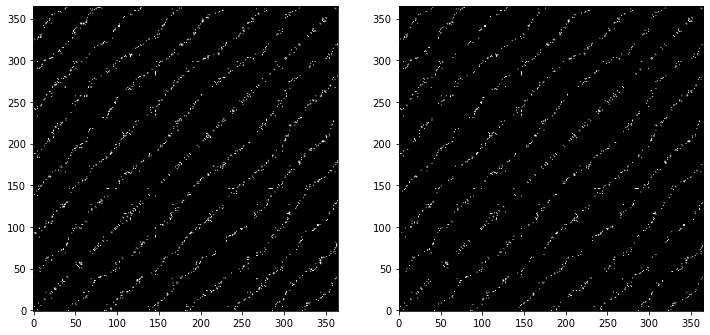

In [22]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].imshow(df_q, origin='lower', cmap = cm.Greys_r)
ax[1].imshow(df_r, origin='lower', cmap = cm.Greys_r)

(4085497.682154004, 4089497.682154004)

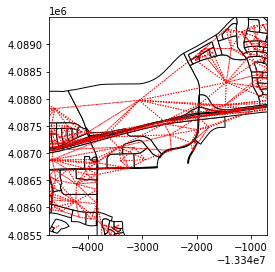

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Plot tract geography
fig, ax = plt.subplots(figsize=(4, 4))

minx, miny, maxx, maxy = go_proj.centroid.buffer(2000).total_bounds;

gol_data.plot(ax=ax, fc='w', ec='k');
w_queen.plot(gol_data,ax=ax, edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""));

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

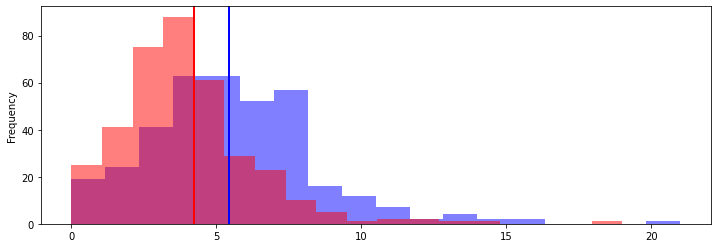

In [24]:
import pandas as pd

fig, ax = plt.subplots(figsize=(12,4))

# check the number of neighbors
s = pd.Series(w_queen.cardinalities)
s2 = pd.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0], ax=ax, color='b', alpha=.5);
s2.plot.hist(bins=s.unique().shape[0], ax=ax, color='r', alpha=.5);

ax.axvline(s.mean(), color='b', lw=2)
ax.axvline(s2.mean(), color='r', lw=2)

# Weight matrices 

* Contiguity-based
* Distance-based
* Kernel-based

In [25]:
knn4_w = weights.distance.KNN.from_dataframe(gol_data, k=4)

knn4_w.islands

[]

In [26]:
knn4_w.histogram

[(4, 365)]

In [27]:
points = np.array([[0,0], [1,5], [2,1], [3,6], [5,6], [7,1], [1,7]])

from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_width=2, point_size=10)

for i,j in enumerate(points):
    plt.annotate(i, j+0.1, ha='left', va='bottom', weight='bold')

fig.savefig('vor.png')
plt.close()

# Exercise 

> Create a weight matrix for the units below. 

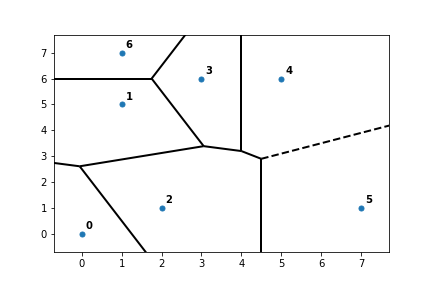

In [28]:
from IPython.display import Image
Image(filename='vor.png') 

# More examples on spatial weighs 

For more examples check out the [Chapter on Spatial Weights in Geographic Data Science](https://geographicdata.science/book/notebooks/04_spatial_weights.html)

# Issues with Spatial Data

* Abstraction
* Data errors and Uncertainty (think about GPS accuracy versus Bluetooth accuracy) 
* Independence Assumption
* Measurement and methods
* Boundary
* MAUP and Ecological Fallacy

## PROBLEM: Statistics requires random sample. Geographic samples are almost never random. 
## SOLUTION: Account for this and run tests. 

# Spatial Autocorrelation

* Closer objects tend to be more similar to one another
* Drawing samples from the same neighborhood is redundant (does not yield any new information)

# Boundary

* Spatial extent matters
    * Size
    * Shape
* Where do we draw a boundary? Franklin County, Columbus MSA, and Columbus will have different population density, but are very close geographically 
* Edge effects, non-uniformity

# Spatial Analysis Concern

* Modifiable Area Unit Problem
    * Method is sensitive to spatial scale / unit definition
    * Changes in spatial representation might affect outcomes 
* Ecological Fallacy 
    * erroneous conculsion made about individuals in the area based on aggregate characteristics of area

Source: [GIS Lounge](https://www.gislounge.com/modifiable-areal-unit-problem-gis/)
<img src="https://cdn.shortpixel.ai/spai/w_810+q_glossy+ret_img+to_webp/https://www.gislounge.com/wp-content/uploads/2018/06/maup.png">

Source: Swift, A., Liu, L., & Uber, J. (2008). Reducing MAUP bias of correlation statistics between water quality and GI illness. Computers, Environment and Urban Systems, 32(2), 134-148.
<img src="https://cdn.shortpixel.ai/spai/w_810+q_glossy+ret_img+to_webp/https://www.gislounge.com/wp-content/uploads/2018/06/maup-GIS-effect.png">

# More examples on MAUP with Python Code

https://gist.github.com/darribas/8b5a7b93d4085223f1c5

# Questions? 